In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
checker = pd.read_sql("SELECT * FROM checker;", conn)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
query = """
SELECT 
    DATE(timestamp) as date,
    CAST(strftime('%H', timestamp) AS INTEGER) as hour,
    CASE 
        WHEN strftime('%w', timestamp) IN ('0', '6') THEN 'weekend'
        ELSE 'working_day'
    END as week_time
FROM checker
WHERE uid LIKE 'user_%'
"""

checker = pd.read_sql(query, conn)

checker_working_day = checker[checker['week_time'] == 'working_day']['hour']
checker_weekend = checker[checker['week_time'] == 'weekend']['hour']
print(checker_working_day.count())
print(checker_weekend.count())

2037
1170


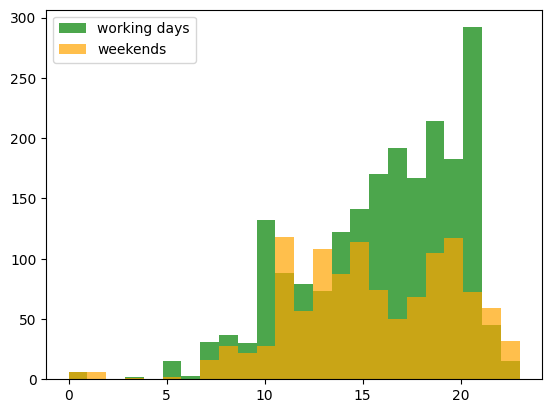

In [5]:
plt.hist(checker_working_day, bins=24, alpha=0.7, label='working days', color='green')
plt.hist(checker_weekend, bins=24, alpha=0.7, label='weekends', color='orange')
plt.figsize=(15, 8)
plt.legend()
plt.show()

In [6]:
conn.close()